In [41]:
import warnings
warnings.filterwarnings("ignore")
# import system libs
import os
import itertools
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
print ('modules loaded')

modules loaded


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
train_data_dir = '/content/drive/MyDrive/Training'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

print(labels)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)

['Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma Tumor', 'Glioma

In [44]:
train_df

,filepaths,labels
0,/content/drive/MyDrive/Training/Glioma Tumor/g...,Glioma Tumor
1,/content/drive/MyDrive/Training/Glioma Tumor/g...,Glioma Tumor
2,/content/drive/MyDrive/Training/Glioma Tumor/g...,Glioma Tumor
3,/content/drive/MyDrive/Training/Glioma Tumor/g...,Glioma Tumor
4,/content/drive/MyDrive/Training/Glioma Tumor/g...,Glioma Tumor
...,...,...
2887,/content/drive/MyDrive/Training/Pituitary Tumo...,Pituitary Tumor
2888,/content/drive/MyDrive/Training/Pituitary Tumo...,Pituitary Tumor
2889,/content/drive/MyDrive/Training/Pituitary Tumo...,Pituitary Tumor
2890,/content/drive/MyDrive/Training/Pituitary Tumo...,Pituitary Tumor


In [45]:
# Generate data paths with labels
test_data_dir = '/content/drive/MyDrive/Testing'
filepaths = []
labels = []
folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [46]:
ts_df

,filepaths,labels
0,/content/drive/MyDrive/Testing/Pituitary Tumor...,Pituitary Tumor
1,/content/drive/MyDrive/Testing/Pituitary Tumor...,Pituitary Tumor
2,/content/drive/MyDrive/Testing/Pituitary Tumor...,Pituitary Tumor
3,/content/drive/MyDrive/Testing/Pituitary Tumor...,Pituitary Tumor
4,/content/drive/MyDrive/Testing/Pituitary Tumor...,Pituitary Tumor
...,...,...
389,/content/drive/MyDrive/Testing/Glioma Tumor/im...,Glioma Tumor
390,/content/drive/MyDrive/Testing/Glioma Tumor/im...,Glioma Tumor
391,/content/drive/MyDrive/Testing/Glioma Tumor/im...,Glioma Tumor
392,/content/drive/MyDrive/Testing/Glioma Tumor/im...,Glioma Tumor


In [47]:
# valid and test dataframe
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [48]:
test_df

,filepaths,labels
220,/content/drive/MyDrive/Testing/Meningioma Tumo...,Meningioma Tumor
245,/content/drive/MyDrive/Testing/Meningioma Tumo...,Meningioma Tumor
134,/content/drive/MyDrive/Testing/No Tumor/image(...,No Tumor
147,/content/drive/MyDrive/Testing/No Tumor/image(...,No Tumor
384,/content/drive/MyDrive/Testing/Glioma Tumor/im...,Glioma Tumor
...,...,...
216,/content/drive/MyDrive/Testing/Meningioma Tumo...,Meningioma Tumor
49,/content/drive/MyDrive/Testing/Pituitary Tumor...,Pituitary Tumor
37,/content/drive/MyDrive/Testing/Pituitary Tumor...,Pituitary Tumor
34,/content/drive/MyDrive/Testing/Pituitary Tumor...,Pituitary Tumor


In [49]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 2892 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.


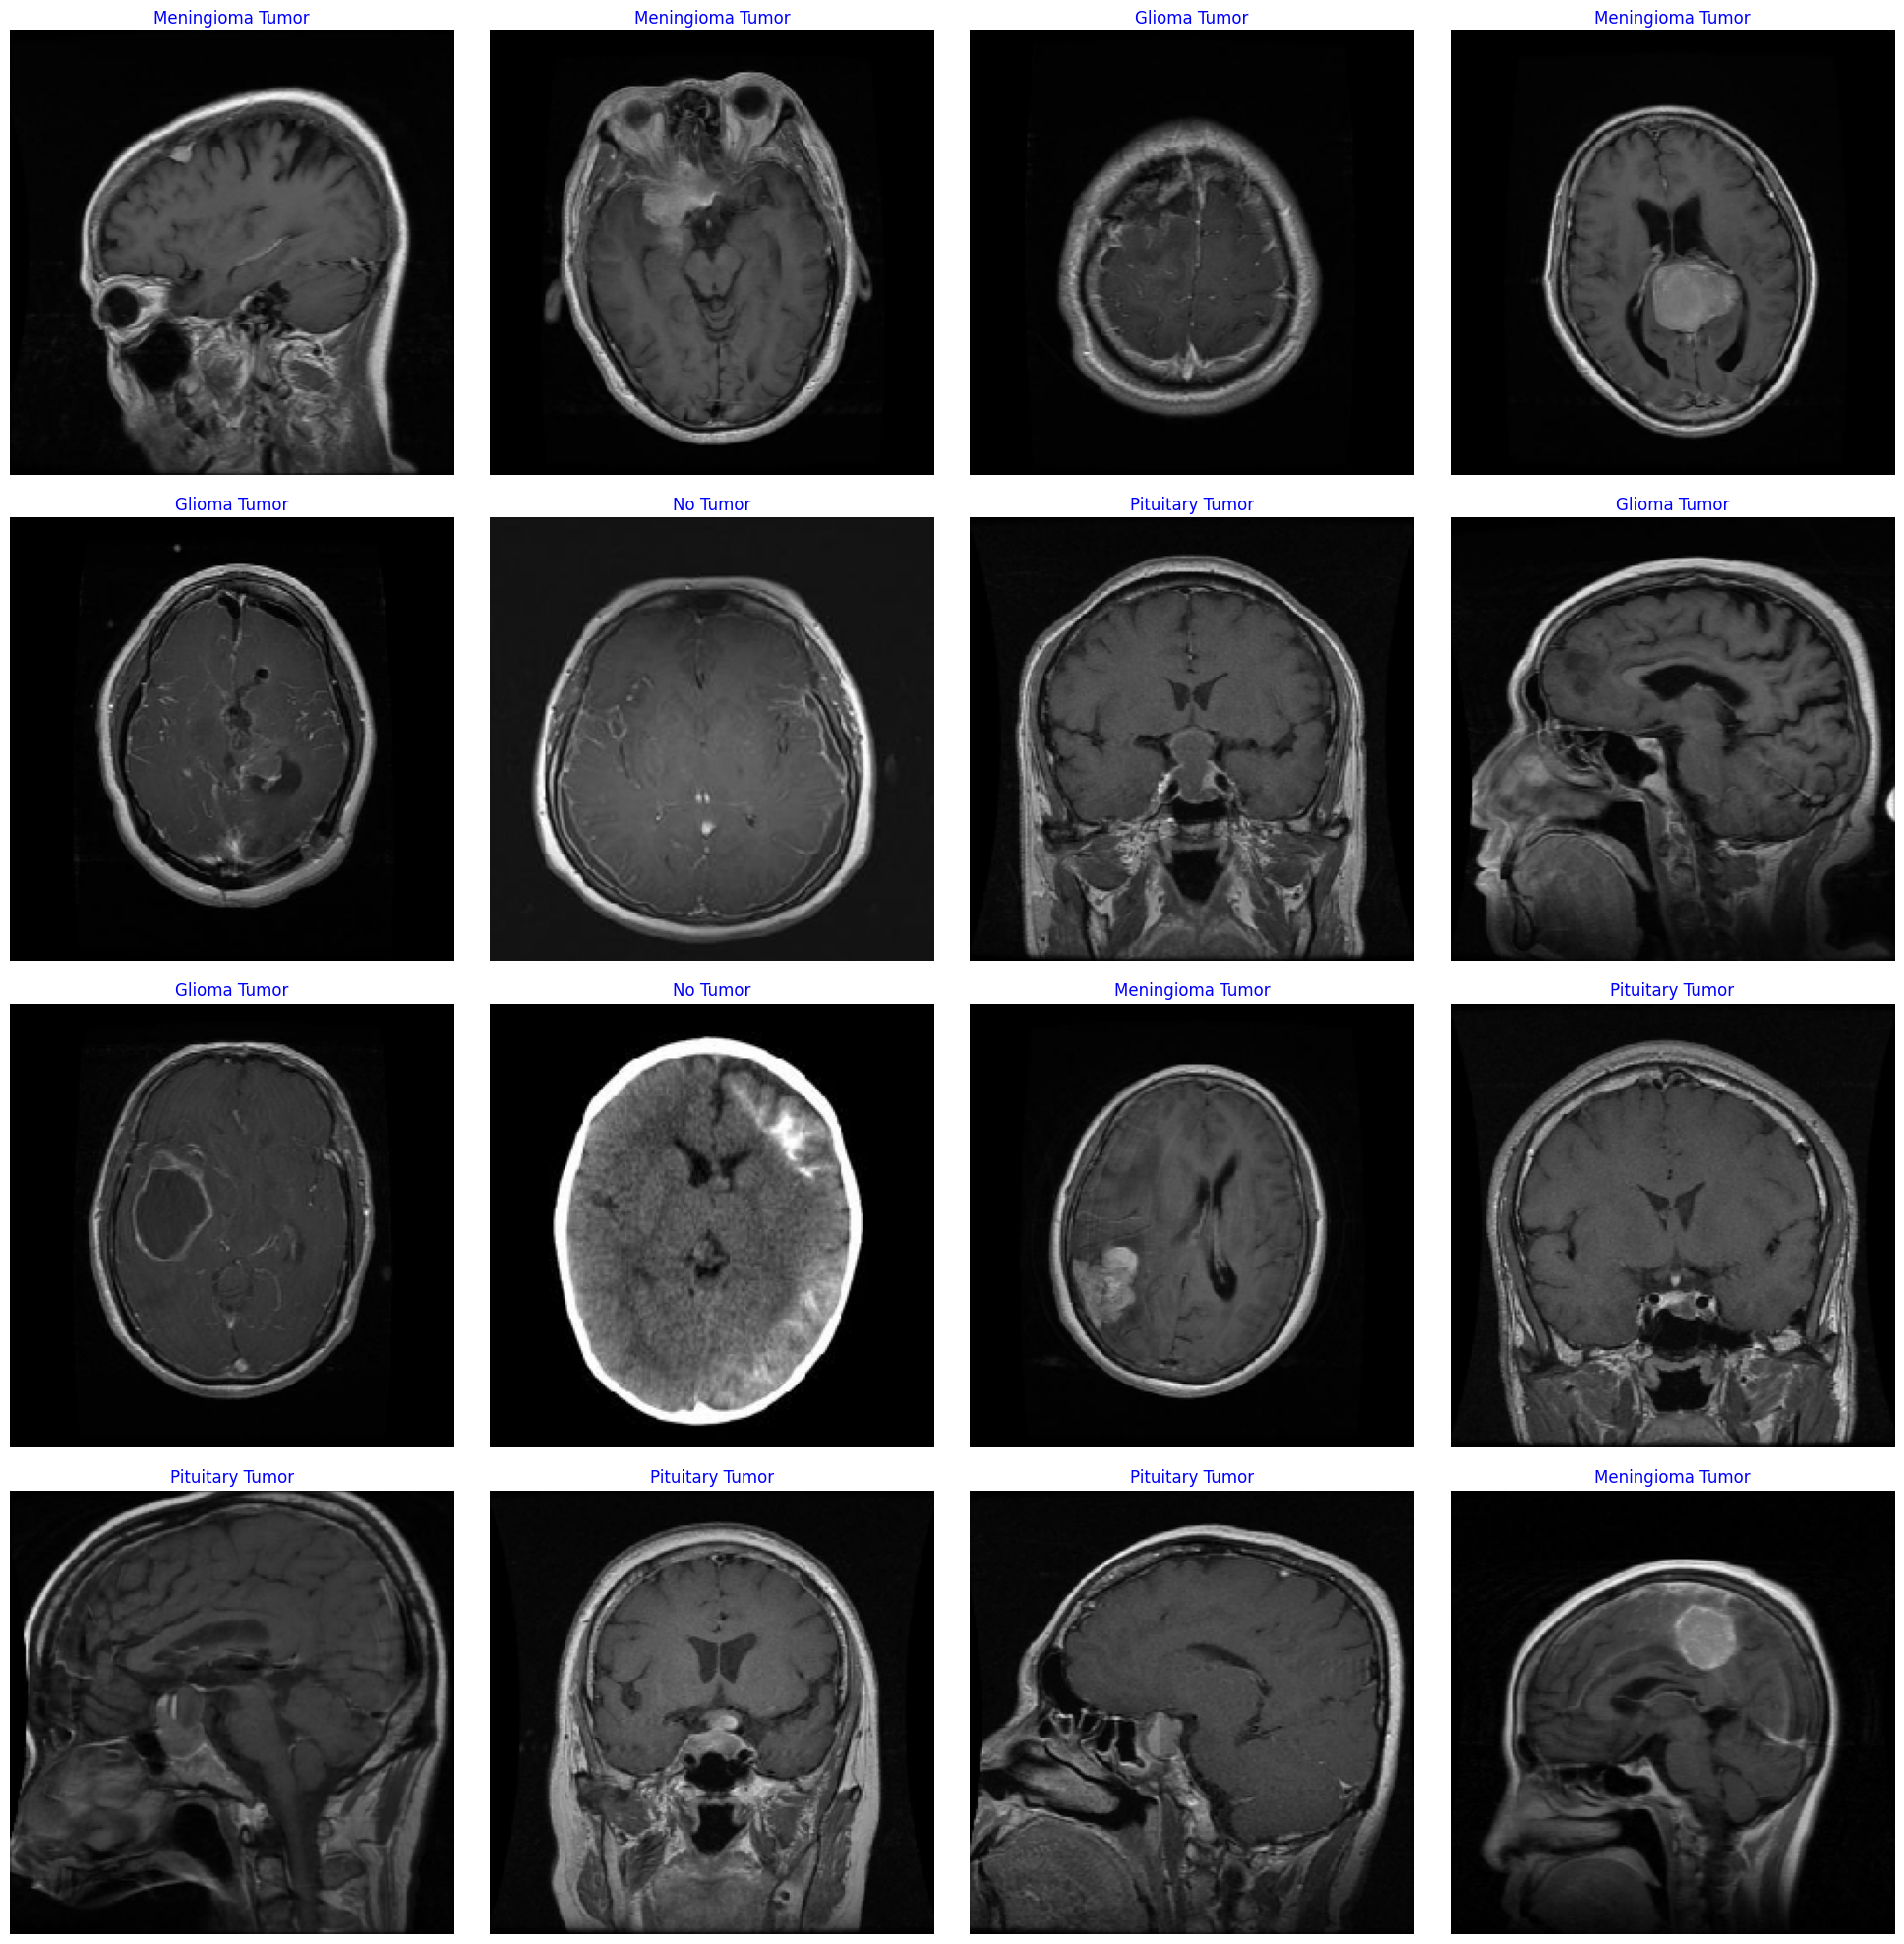

In [50]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adamax

# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))
model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1), input_shape= img_shape),
    Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation=LeakyReLU(alpha=0.1)),
    Dense(256, activation=LeakyReLU(alpha=0.1)),
    Dense(class_count, activation='softmax')
])

model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 224, 224, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,32

 Total params: 5,036,116 (19.21 MB)

 Trainable params: 5,036,116 (19.21 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
epochs = 20

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 31s 117ms/step - accuracy: 0.3685 - loss: 2.3798 - val_accuracy: 0.2234 - val_loss: 2.6754
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.6392 - loss: 0.8627 - val_accuracy: 0.3706 - val_loss: 2.2546
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.7346 - loss: 0.6109 - val_accuracy: 0.3858 - val_loss: 2.5208
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.8030 - loss: 0.4754 - val_accuracy: 0.5076 - val_loss: 2.0152
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8763 - loss: 0.3594 - val_accuracy: 0.5482 - val_loss: 2.0316
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.8898 - loss: 0.2843 - val_accuracy: 0.6954 - val_loss: 3.0679
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9394 - loss: 0.1698 - val_accuracy: 0.6497 - val_loss: 2.4280
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9551 - loss: 0.1389 -

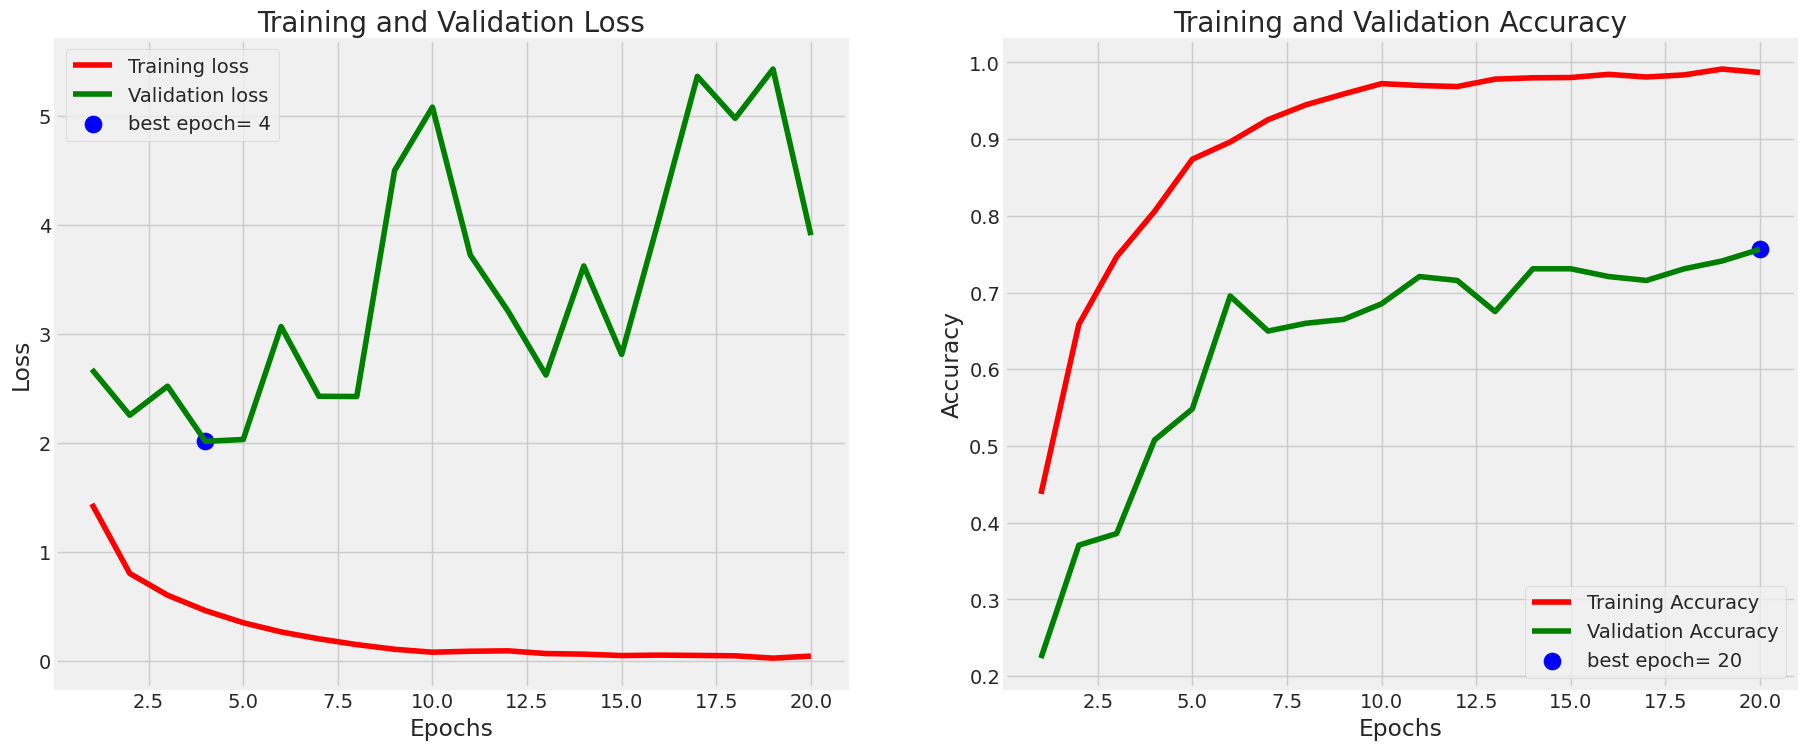

In [53]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [54]:
# Get testing metrics once (accuracy+loss) — adapt test_data to your loader
test_loss, test_acc = model.evaluate(test_gen, verbose=0)
print(f"Test — loss: {test_loss:.4f}, acc: {test_acc:.4f}")

Test — loss: 3.4436, acc: 0.7766


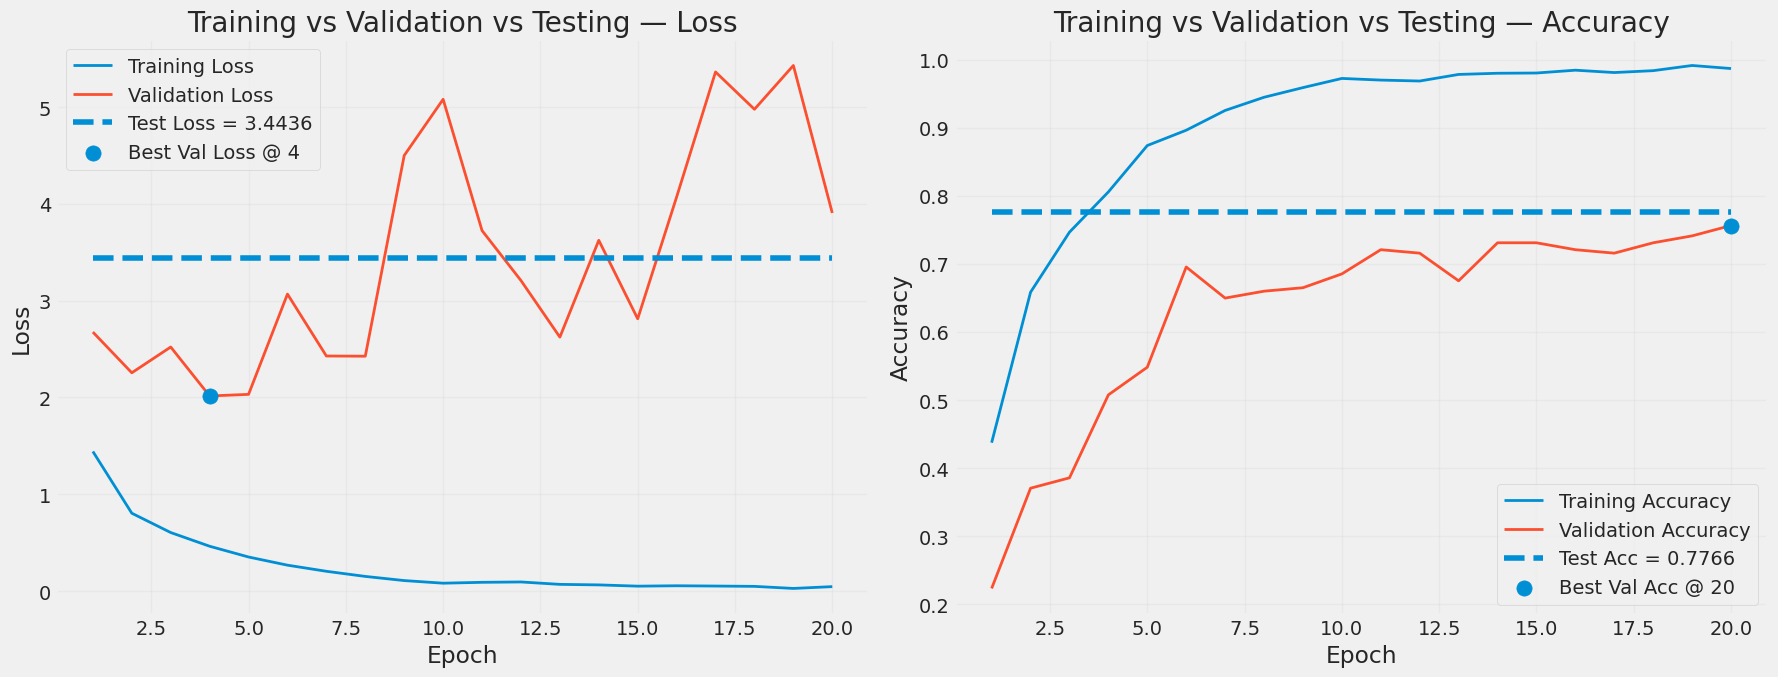

In [55]:
import numpy as np
import matplotlib.pyplot as plt

tr_acc  = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

# Best epochs
ep = np.arange(1, len(tr_acc)+1)
i_best_loss = int(np.argmin(val_loss))
i_best_acc  = int(np.argmax(val_acc))

plt.figure(figsize=(18,7))
plt.style.use('fivethirtyeight')

# ---- Loss subplot
ax1 = plt.subplot(1,2,1)
ax1.plot(ep, tr_loss,  label='Training Loss',  linewidth=2)
ax1.plot(ep, val_loss, label='Validation Loss', linewidth=2)

# testing has no per-epoch curve -> draw a horizontal line across epochs
ax1.hlines(test_loss, xmin=ep[0], xmax=ep[-1], linestyles='--', label=f'Test Loss = {test_loss:.4f}')

# mark best val loss
ax1.scatter(i_best_loss+1, val_loss[i_best_loss], s=120, zorder=3, label=f'Best Val Loss @ {i_best_loss+1}')
ax1.set_title('Training vs Validation vs Testing — Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='best')
ax1.grid(alpha=0.2)

# ---- Accuracy subplot
ax2 = plt.subplot(1,2,2)
ax2.plot(ep, tr_acc,  label='Training Accuracy',  linewidth=2)
ax2.plot(ep, val_acc, label='Validation Accuracy', linewidth=2)

# testing accuracy horizontal line
ax2.hlines(test_acc, xmin=ep[0], xmax=ep[-1], linestyles='--', label=f'Test Acc = {test_acc:.4f}')

# mark best val acc
ax2.scatter(i_best_acc+1, val_acc[i_best_acc], s=120, zorder=3, label=f'Best Val Acc @ {i_best_acc+1}')
ax2.set_title('Training vs Validation vs Testing — Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='best')
ax2.grid(alpha=0.2)

plt.tight_layout()
plt.show()


181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


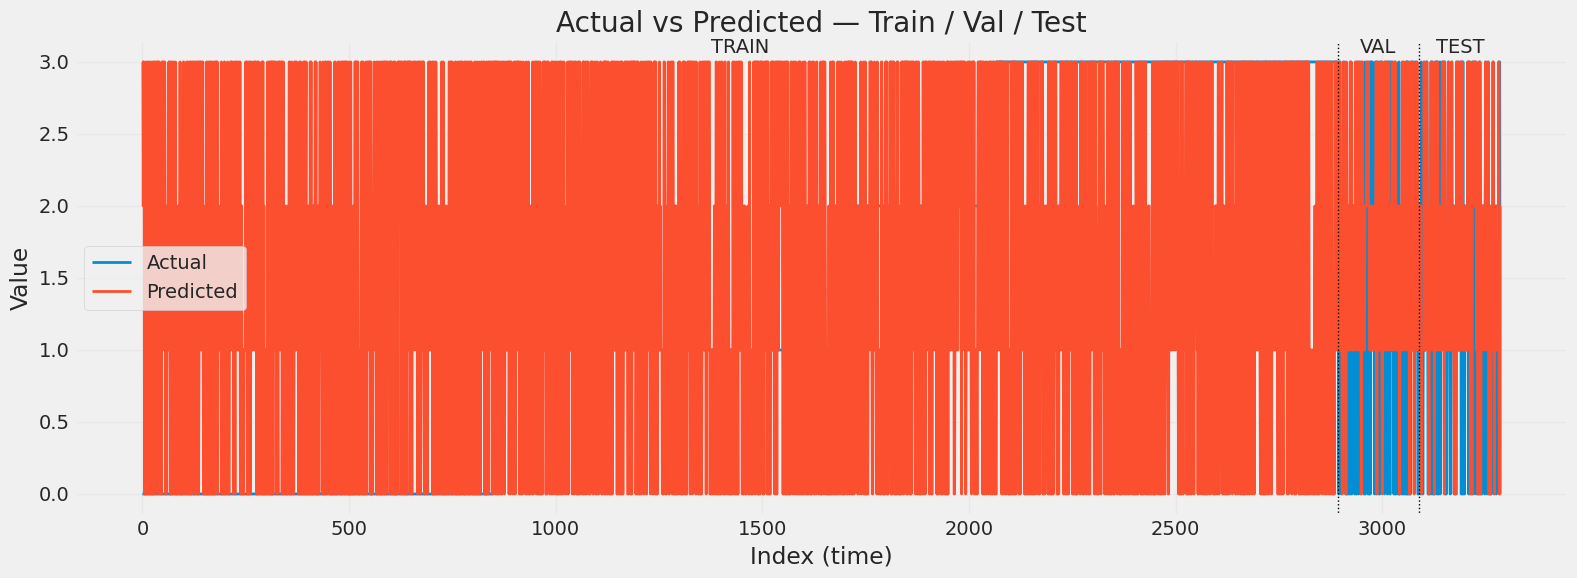

In [56]:
# Provide these arrays if you have them:
# y_train_true, y_train_pred
# y_val_true,   y_val_pred
# y_test_true,  y_test_pred

import numpy as np
import matplotlib.pyplot as plt

# Get true labels from generators
y_train_true = train_gen.classes
y_val_true = valid_gen.classes
y_test_true = test_gen.classes

# Get predictions from the model
y_train_pred = np.argmax(model.predict(train_gen), axis=1)
y_val_pred = np.argmax(model.predict(valid_gen), axis=1)
y_test_pred = np.argmax(model.predict(test_gen), axis=1)


# Concatenate splits to show a continuous timeline
y_true = np.concatenate([y_train_true, y_val_true, y_test_true])
y_pred = np.concatenate([y_train_pred, y_val_pred, y_test_pred])

# Boundaries (to annotate TRAIN / VAL / TEST)
n_tr   = len(y_train_true)
n_val  = len(y_val_true)
n_te   = len(y_test_true)

plt.figure(figsize=(16,6))
plt.plot(y_true, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linewidth=2)

# vertical split markers
plt.axvline(n_tr, color='k', linestyle=':', linewidth=1)
plt.axvline(n_tr+n_val, color='k', linestyle=':', linewidth=1)

# zone labels
plt.text(n_tr/2, np.max(y_true)*1.02, 'TRAIN', ha='center')
plt.text(n_tr + n_val/2, np.max(y_true)*1.02, 'VAL', ha='center')
plt.text(n_tr + n_val + n_te/2, np.max(y_true)*1.02, 'TEST', ha='center')

plt.title('Actual vs Predicted — Train / Val / Test')
plt.xlabel('Index (time)')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [57]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9975 - loss: 0.0098
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7645 - loss: 3.7929
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7744 - loss: 3.4262
Train Loss:  0.00896376185119152
Train Accuracy:  0.9979252815246582
--------------------
Validation Loss:  3.905832052230835
Validation Accuracy:  0.7563451528549194
--------------------
Test Loss:  3.443648099899292
Test Accuracy:  0.7766497731208801


In [58]:
preds = model.predict(test_gen)   # Use model.predict instead of model.predict_generator
y_pred = np.argmax(preds, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


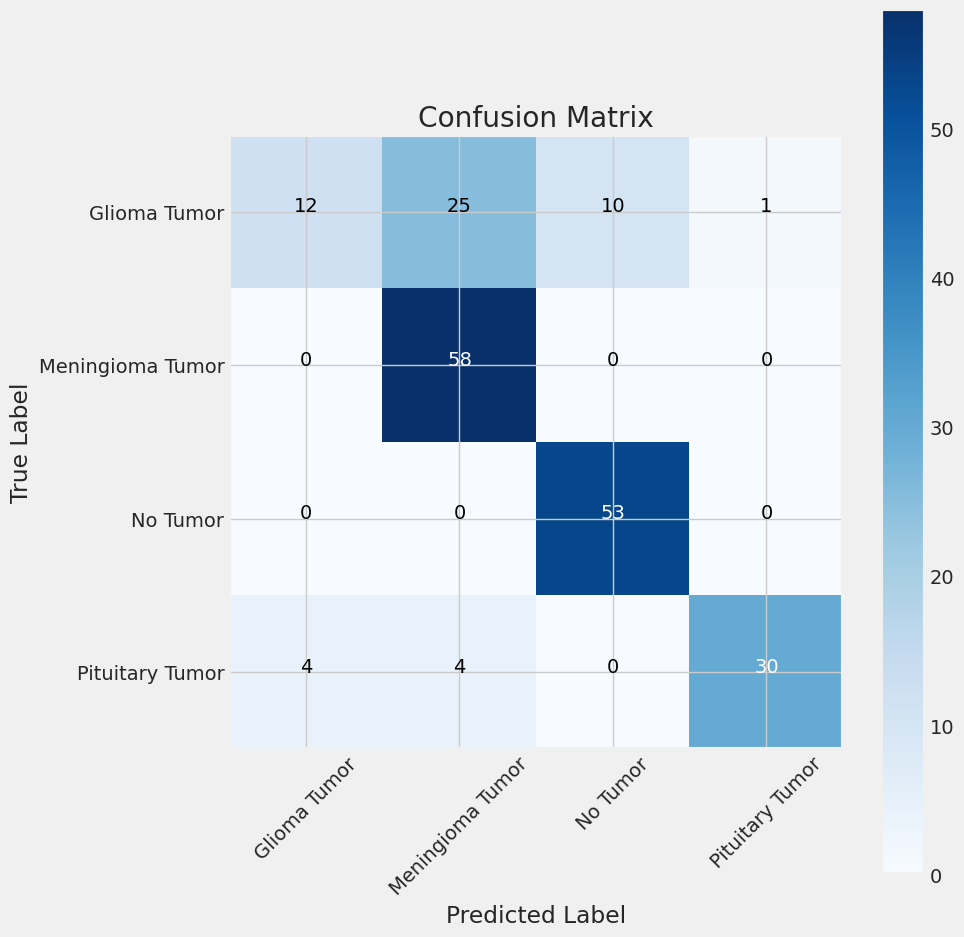

In [59]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


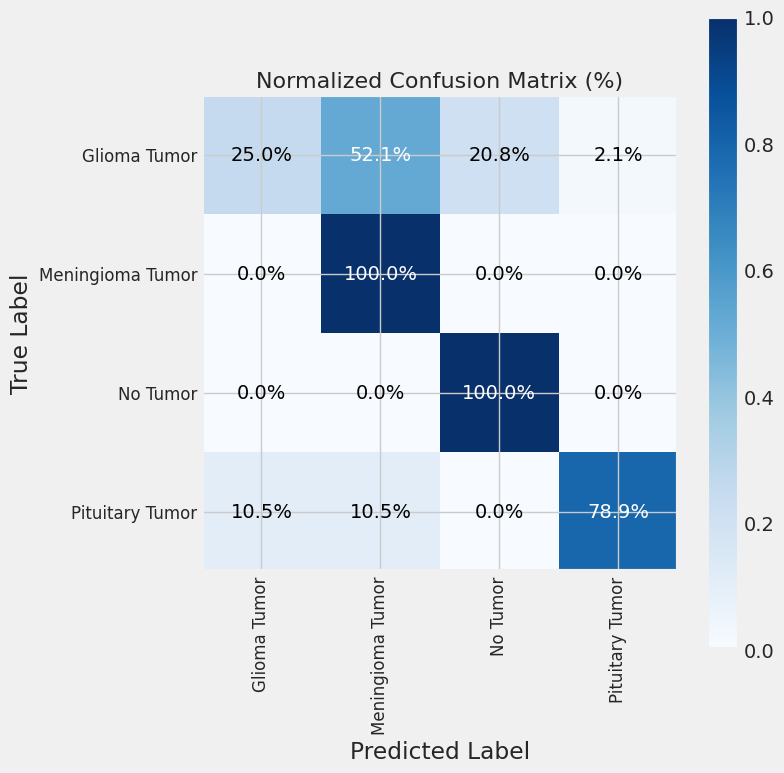

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Get class names from your test generator
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Compute confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

# Normalize the confusion matrix (row-wise)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix (%)', fontsize=16)
plt.colorbar()

# Tick marks and labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90, fontsize=12)  # vertical tumor names
plt.yticks(tick_marks, classes, fontsize=12)

# Display percentage values in cells
thresh = cm_norm.max() / 2.0
for i, j in itertools.product(range(cm_norm.shape[0]), range(cm_norm.shape[1])):
    plt.text(j, i, f"{cm_norm[i, j]*100:.1f}%",
             horizontalalignment='center',
             verticalalignment='center',
             color='white' if cm_norm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [61]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

    Glioma Tumor       0.75      0.25      0.38        48
Meningioma Tumor       0.67      1.00      0.80        58
        No Tumor       0.84      1.00      0.91        53
 Pituitary Tumor       0.97      0.79      0.87        38

        accuracy                           0.78       197
       macro avg       0.81      0.76      0.74       197
    weighted avg       0.79      0.78      0.74       197



In [62]:
model.save('Brain Tumors.h5')

In [63]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.layers import LeakyReLU # Import LeakyReLU

model_path = os.path.join('/content/drive/MyDrive/brain tumor/', 'Brain Tumors.h5')
model.save(model_path)

# Define custom_objects to handle LeakyReLU during loading
custom_objects = {'LeakyReLU': LeakyReLU}

loaded_model = tf.keras.models.load_model(model_path, compile=False, custom_objects=custom_objects)
loaded_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
image_path = '/content/drive/MyDrive/Training/Meningioma Tumor/m (102).jpg'
image = Image.open(image_path).convert('RGB')

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = list(test_gen.class_indices.keys()) # Use the class labels from the test generator
print(f"{class_labels[np.argmax(predictions)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
Meningioma Tumor


In [65]:
from google.colab import files
from PIL import Image
import tensorflow as tf
import numpy as np

# Upload image directly
uploaded = files.upload()  # Opens file upload dialog in Colab
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    image_path = filename  # get the first uploaded file

# Open and preprocess image
image = Image.open(image_path).convert('RGB')
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # shape (1, 224, 224, 3)

# Make prediction
predictions = loaded_model.predict(img_array)
class_labels = list(test_gen.class_indices.keys())  # use your test generator’s class labels
predicted_label = class_labels[np.argmax(predictions)]

print(f"Predicted label: {predicted_label}")

Saving image (7).jpg to image (7).jpg
Uploaded file: image (7).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted label: No Tumor


✅ Wrapped model built. Top layers: ['input_layer_4', 'sequential_2']
Conv2D layers found inside wrapped graph: ['conv2d_32', 'conv2d_33', 'conv2d_34', 'conv2d_35', 'conv2d_36', 'conv2d_37', 'conv2d_38', 'conv2d_39', 'conv2d_40', 'conv2d_41', 'conv2d_42', 'conv2d_43', 'conv2d_44', 'conv2d_45', 'conv2d_46', 'conv2d_47']
Using Conv2D layer for Grad-CAM: conv2d_47
Using image_path: image (7).jpg
Predicted: Glioma Tumor
Probabilities: {'Glioma Tumor': 0.4052, 'Meningioma Tumor': 0.135, 'No Tumor': 0.1805, 'Pituitary Tumor': 0.2793}


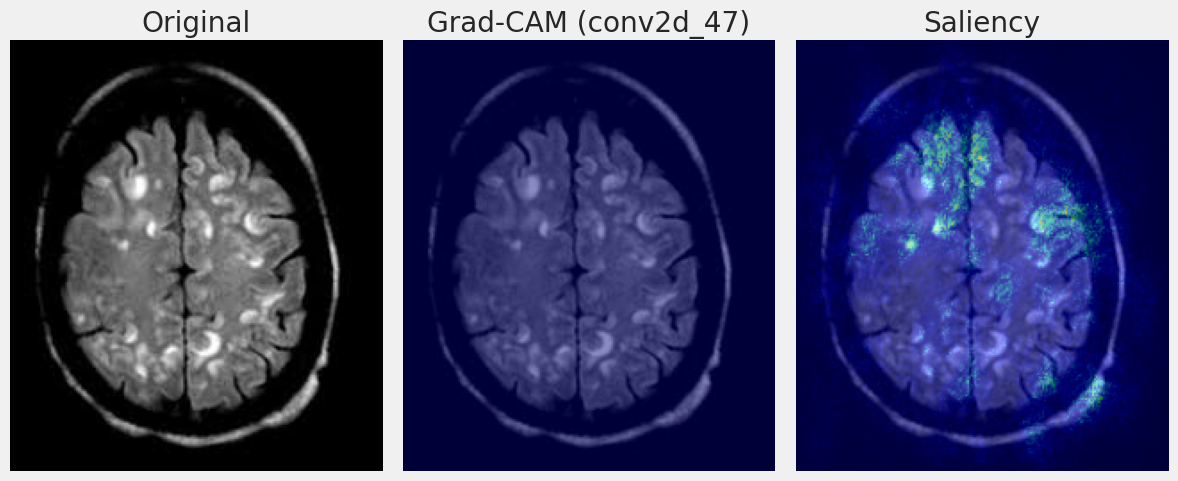

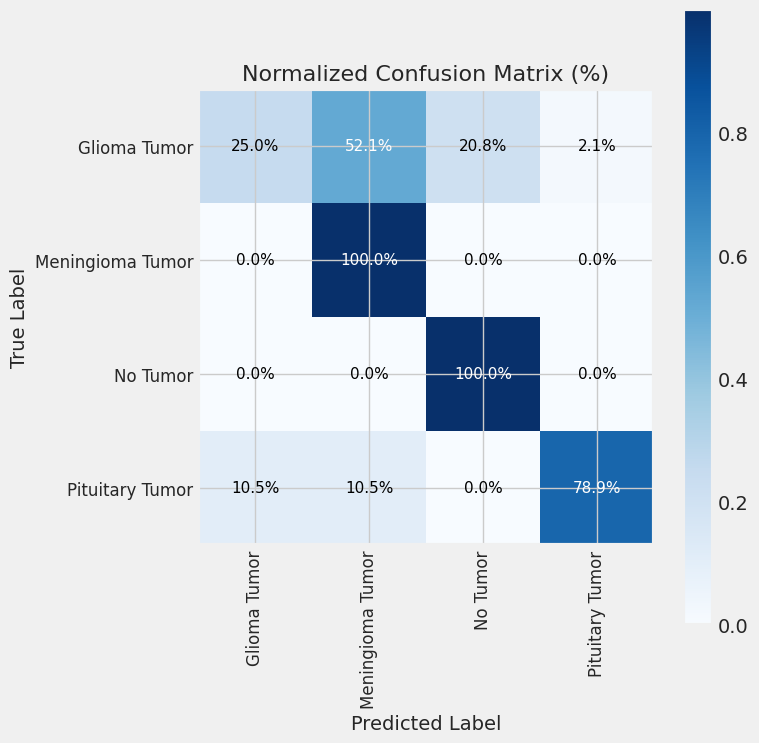


Classification Report:
                  precision    recall  f1-score   support

    Glioma Tumor     0.7500    0.2500    0.3750        48
Meningioma Tumor     0.6667    1.0000    0.8000        58
        No Tumor     0.8413    1.0000    0.9138        53
 Pituitary Tumor     0.9677    0.7895    0.8696        38

        accuracy                         0.7766       197
       macro avg     0.8064    0.7599    0.7396       197
    weighted avg     0.7920    0.7766    0.7405       197



In [66]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import itertools
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Model, Input

# ---------- 0) Attach to your existing objects ----------
if 'model' not in globals():
    if 'loaded_model' in globals():
        model = loaded_model
    else:
        raise RuntimeError("No model found. Define model or loaded_model before running this cell.")

if 'test_gen' in globals():
    class_names = list(test_gen.class_indices.keys())
else:
    raise RuntimeError("test_gen not found. Please define your test generator first.")

# infer input size (W,H)
try:
    ish = model.input_shape
    if isinstance(ish, list): ish = ish[0]
    IMG_SIZE = (int(ish[2]), int(ish[1])) if len(ish) == 4 else (224, 224)
except Exception:
    IMG_SIZE = (224, 224)
W, H = IMG_SIZE[0], IMG_SIZE[1]

# ---------- 1) Wrap original model into a Functional model ----------
def make_functional(m, img_size=(W, H)):
    x_in = Input(shape=(img_size[1], img_size[0], 3))   # (H,W,3)
    y_out = m(x_in, training=False)                     # reuse weights
    return Model(inputs=x_in, outputs=y_out, name="wrapped_for_xai")

wrapped = make_functional(model, (W, H))
print("✅ Wrapped model built. Top layers:", [l.name for l in wrapped.layers])

# ---------- 2) Helpers ----------
def preprocess_pil_image(pil_img, target_size=(W, H)):
    pil_img = pil_img.convert("RGB").resize(target_size, resample=Image.BILINEAR)
    arr = np.array(pil_img).astype("float32") / 255.0
    return np.expand_dims(arr, axis=0)  # (1,H,W,3)

def overlay_heatmap_on_image(img_pil, heatmap, alpha=0.45, colormap=plt.cm.jet):
    hm = Image.fromarray(np.uint8(heatmap * 255)).resize(img_pil.size, resample=Image.BILINEAR)
    hm = np.array(hm) / 255.0
    cmap = colormap(hm)[..., :3]
    cmap = np.uint8(cmap * 255)
    return Image.blend(img_pil.convert("RGBA"), Image.fromarray(cmap).convert("RGBA"), alpha=alpha)

def find_conv_layers_in_wrapped(m):
    names = []
    for lyr in m.layers:
        if isinstance(lyr, Conv2D):
            names.append(lyr.name)
        if hasattr(lyr, "layers"):
            for sub in lyr.layers:
                if isinstance(sub, Conv2D):
                    names.append(sub.name)
    return names

def get_last_conv_layer_obj_from_wrapped(m):
    # returns the actual layer object (search nested too)
    for lyr in reversed(m.layers):
        if isinstance(lyr, Conv2D):
            return lyr
    for lyr in reversed(m.layers):
        if hasattr(lyr, "layers"):
            for sub in reversed(lyr.layers):
                if isinstance(sub, Conv2D):
                    return sub
    return None

conv_names = find_conv_layers_in_wrapped(wrapped)
print("Conv2D layers found inside wrapped graph:", conv_names)

target_conv_layer = get_last_conv_layer_obj_from_wrapped(wrapped)
if target_conv_layer is None:
    raise RuntimeError("No Conv2D layer found in wrapped graph. Grad-CAM needs a Conv2D layer.")
print("Using Conv2D layer for Grad-CAM:", target_conv_layer.name)

# ---------- 3) Grad-CAM (compute activation & grads using intermediate model) ----------
def make_gradcam_heatmap_from_intermediate(img_array, wrapped_model, target_layer_obj, pred_index=None):
    last_conv_layer_name = target_layer_obj.name

    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
        # It's better to watch the output of the convolutional layer itself for Grad-CAM

        # Get the 'sequential' sub-model (which is our original Keras Sequential model)
        # Changed 'sequential' to 'sequential_2' to match the actual layer name
        sequential_sub_model = wrapped_model.get_layer('sequential_2')

        # Manually trace the input through the sequential sub-model
        # to get the correct intermediate activation tensor within the wrapped_model's graph.
        x = wrapped_model.input
        target_conv_layer_output_symbolic = None # Store symbolic tensor
        for layer in sequential_sub_model.layers:
            x = layer(x)
            if layer.name == last_conv_layer_name:
                target_conv_layer_output_symbolic = x
                break

        if target_conv_layer_output_symbolic is None:
            raise RuntimeError(f"Could not find intermediate output for layer {last_conv_layer_name}")

        # Create a single model that outputs both the target conv layer's activation
        # and the final prediction from the `wrapped_model`'s forward pass.
        grad_model = tf.keras.models.Model(inputs=wrapped_model.input, outputs=[target_conv_layer_output_symbolic, wrapped_model.output])

        # Get the activations of the last conv layer and predictions
        last_conv_layer_output, preds = grad_model(img_tensor)

        # Explicitly watch the output of the last convolutional layer for gradient computation
        tape.watch(last_conv_layer_output)

        # Select the channel for which we want to compute Grad-CAM
        if pred_index is None:
            if preds.shape[-1] == 1:
                class_channel = preds[:, 0]
            else:
                pred_index = tf.argmax(preds[0])
                class_channel = preds[:, pred_index]
        else:
            class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer.
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Handle case where grads might still be None (e.g., if path is non-differentiable)
    if grads is None:
        print(f"Warning: Gradient for layer '{last_conv_layer_name}' is None. Returning an empty heatmap.")
        return np.zeros(last_conv_layer_output.shape[1:3]) # Return an empty array if gradients are not found

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel.
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array by "how important that channel is"
    # with regard to the top predicted class.
    last_conv_layer_output = last_conv_layer_output[0]
    # tf.einsum is more explicit but @ is fine for simple dot product
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we use ReLU on the heatmap
    # And normalize it between 0 and 1.
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

# ---------- 4) Saliency (vanilla grads) ----------
def saliency_map(img_array, wrapped_model, pred_index=None):
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        preds = wrapped_model(img_tensor, training=False)
        if pred_index is None:
            if preds.shape[-1] == 1:
                target = preds[:, 0]
            else:
                pred_index = tf.argmax(preds[0])
                target = preds[:, pred_index]
        else:
            target = preds[:, pred_index]
    grads = tape.gradient(target, img_tensor)                         # (1,H,W,3)
    sal = tf.reduce_max(tf.abs(grads), axis=-1)[0]
    sal = sal / (tf.reduce_max(sal) + 1e-8)
    return sal.numpy()

# ---------- 5) Visualize everything for your already-loaded image ----------
def visualize_explanations_from_pil(pil_img, wrapped_model, target_layer_obj, alpha=0.45):
    x = preprocess_pil_image(pil_img, (W, H))    # (1,H,W,3)
    preds = wrapped_model.predict(x, verbose=0)
    if preds.shape[-1] == 1:
        pred_idx = int(preds[0,0] >= 0.5)
        prob_vec = np.array([1 - preds[0,0], preds[0,0]])
    else:
        pred_idx = int(np.argmax(preds[0]))
        prob_vec = preds[0]
    labels = class_names

    print("Predicted:", labels[pred_idx])
    print("Probabilities:", {labels[i]: float(f"{p:.4f}") for i,p in enumerate(prob_vec)})

    # Grad-CAM via intermediate model
    cam = make_gradcam_heatmap_from_intermediate(x, wrapped_model, target_layer_obj, pred_index=pred_idx)
    sal = saliency_map(x, wrapped_model, pred_index=pred_idx)

    # normalize
    def n01(a): a = a - a.min(); return a / (a.max() + 1e-8)
    cam, sal = n01(cam), n01(sal)

    ov_cam = overlay_heatmap_on_image(pil_img, cam, alpha=alpha)
    ov_sal = overlay_heatmap_on_image(pil_img, sal, alpha=alpha)

    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1); plt.imshow(pil_img); plt.title("Original"); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(ov_cam);  plt.title(f"Grad-CAM ({target_layer_obj.name})"); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(ov_sal);  plt.title("Saliency"); plt.axis('off')
    plt.tight_layout(); plt.show()

# ---------- 6) pick your image (re-use image_path or image variable) ----------
try:
    pil_img = Image.open(image_path).convert('RGB')
    print("Using image_path:", image_path)
except Exception:
    if 'image' in globals():
        pil_img = image.convert('RGB')
        print("Using existing image object.")
    else:
        raise RuntimeError("No image available. Define image_path or image earlier.")

# Run the visualizer (this uses the wrapped model and the actual layer object)
visualize_explanations_from_pil(pil_img, wrapped, target_conv_layer)

# ---------- 7) Normalized confusion matrix + classification report (original model) ----------
y_true = test_gen.classes
y_probs = model.predict(test_gen, verbose=0)
y_pred_idx = (y_probs.ravel() >= 0.5).astype(int) if y_probs.shape[-1] == 1 else np.argmax(y_probs, axis=1)

cm = confusion_matrix(y_true, y_pred_idx)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-8)

plt.figure(figsize=(8,8))
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix (%)', fontsize=16); plt.colorbar()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names, rotation=90, fontsize=12)
plt.yticks(ticks, class_names, fontsize=12)
thr = cm_norm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm_norm[i, j]*100:.1f}%", ha='center', va='center',
             color='white' if cm_norm[i, j] > thr else 'black', fontsize=11)
plt.ylabel('True Label', fontsize=14); plt.xlabel('Predicted Label', fontsize=14)
plt.tight_layout(); plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred_idx, target_names=class_names, digits=4))